In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt


def get_all_dataset_paths(h5file):
    """Recursively get all dataset paths in the HDF5 file."""
    paths = []
    def visitor(name, obj):
        if isinstance(obj, h5py.Dataset):
            paths.append(name)
    h5file.visititems(visitor)
    return paths
path_to_hdf5 = "../../results/Ovarian/compute_patches/all/patches.hdf5"



Found datasets: ['A1_NAB_HUG_14_spot12x24', 'A1_NAB_HUG_14_spot12x25', 'A1_NAB_HUG_14_spot12x26', 'A1_NAB_HUG_14_spot12x27', 'A1_NAB_HUG_14_spot12x28', 'A1_NAB_HUG_14_spot13x24', 'A1_NAB_HUG_14_spot13x25', 'A1_NAB_HUG_14_spot13x26', 'A1_NAB_HUG_14_spot13x27', 'A1_NAB_HUG_14_spot13x28', 'A1_NAB_HUG_14_spot13x29', 'A1_NAB_HUG_14_spot14x20', 'A1_NAB_HUG_14_spot14x23', 'A1_NAB_HUG_14_spot14x24', 'A1_NAB_HUG_14_spot14x25', 'A1_NAB_HUG_14_spot14x26', 'A1_NAB_HUG_14_spot14x27', 'A1_NAB_HUG_14_spot14x28', 'A1_NAB_HUG_14_spot14x30', 'A1_NAB_HUG_14_spot14x31', 'A1_NAB_HUG_14_spot15x19', 'A1_NAB_HUG_14_spot15x20', 'A1_NAB_HUG_14_spot15x21', 'A1_NAB_HUG_14_spot15x22', 'A1_NAB_HUG_14_spot15x23', 'A1_NAB_HUG_14_spot15x24', 'A1_NAB_HUG_14_spot15x25', 'A1_NAB_HUG_14_spot15x26', 'A1_NAB_HUG_14_spot15x27', 'A1_NAB_HUG_14_spot15x28', 'A1_NAB_HUG_14_spot15x29', 'A1_NAB_HUG_14_spot15x30', 'A1_NAB_HUG_14_spot15x31', 'A1_NAB_HUG_14_spot15x32', 'A1_NAB_HUG_14_spot15x33', 'A1_NAB_HUG_14_spot15x34', 'A1_NAB_HUG

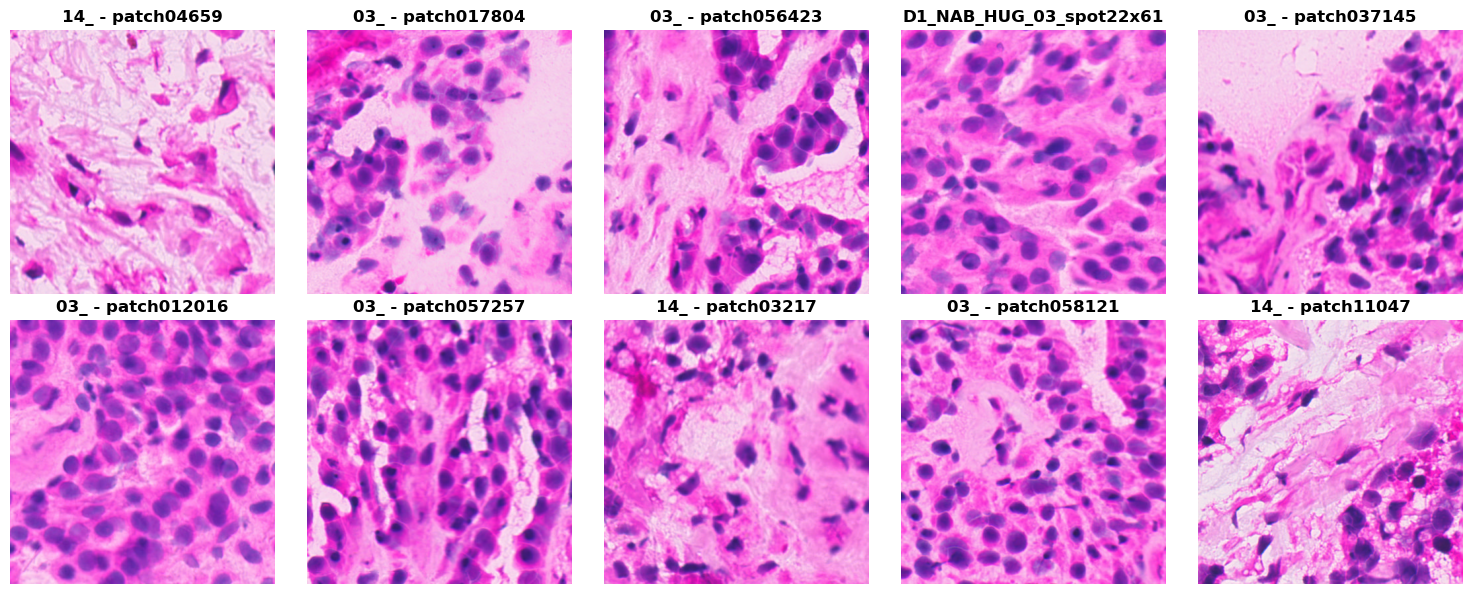

In [9]:
with h5py.File(path_to_hdf5, "r") as f:
    dataset_paths = get_all_dataset_paths(f)
    print("Found datasets:", dataset_paths)
    chosen = np.random.choice(dataset_paths, size=10, replace=False)
    plt.figure(figsize=(15, 6))
    for i, ds_path in enumerate(chosen):
        data = f[ds_path][()]
        # If the image is grayscale, add cmap='gray'
        plt.subplot(2, 5, i + 1)
        if data.ndim == 2:
            plt.imshow(data, cmap='gray')
        else:
            plt.imshow(data.astype(np.uint8))
        plt.axis('off')
        if "_HE_Visium3_Scan1_" in ds_path:
            ds_title = f"{ds_path.split('HE_Visium3_Scan1_')[0][-3:]} - {ds_path.split('HE_Visium3_Scan1_')[1]}"
        else: 
            ds_title = ds_path
        plt.title(ds_title, weight='bold')
    plt.tight_layout()
    plt.show()

In [ ]:
import gzip
import pickle
import openslide


with gzip.open("../../results/Ovarian/compute_patches/all/patches_info.pkl.gz", "rb") as f:
    patches_info = pickle.load(f)


In [ ]:
## Check if coordinates are correct for a spot
spot_info = [patch for patch in patches_info if patch["name"] == "D1_NAB_HUG_03_spot22x61"][0]


# Open the whole slide image
slide = openslide.OpenSlide(spot_info["path_origin"])
# Get a thumbnail for quick visualization
thumbnail = slide.get_thumbnail(slide.dimensions).convert("RGB")

img = np.array(thumbnail)

spot = img[spot_info["start_height_origin"]:spot_info["start_height_origin"]+spot_info["shape_pixel"], 
           spot_info["start_width_origin"]:spot_info["start_width_origin"]+spot_info["shape_pixel"]]

plt.imshow(spot)

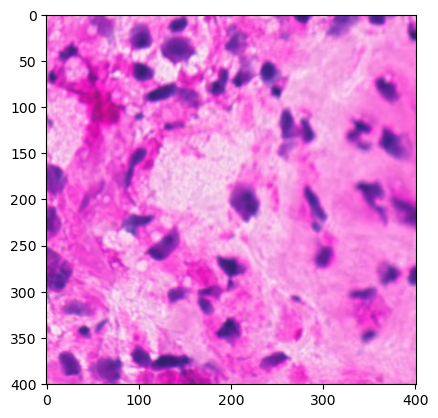

In [27]:

## Check if coordinates are correct for a patch
spot_info = [patch for patch in patches_info if patch["name"] == "NAB-HUG-14_HE_Visium3_Scan1_patch03217"][0]


# Open the whole slide image
slide = openslide.OpenSlide(spot_info["path_origin"])
# Get a thumbnail for quick visualization
thumbnail = slide.get_thumbnail(slide.dimensions).convert("RGB")

img = np.array(thumbnail)

spot = img[spot_info["start_height_origin"]:spot_info["start_height_origin"]+spot_info["shape_pixel"], 
           spot_info["start_width_origin"]:spot_info["start_width_origin"]+spot_info["shape_pixel"]]

plt.imshow(spot)


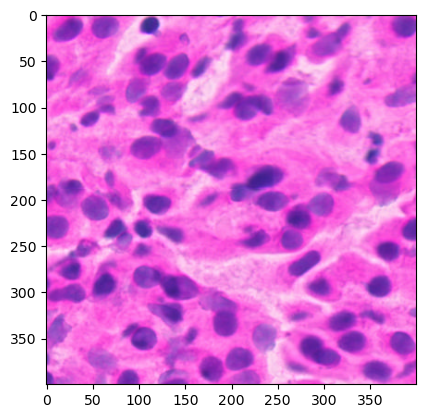